In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('مشروع الانحدار(فردي).csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\farah\AppData\Local\Temp\ipykernel_11312\1421922542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsExperience)


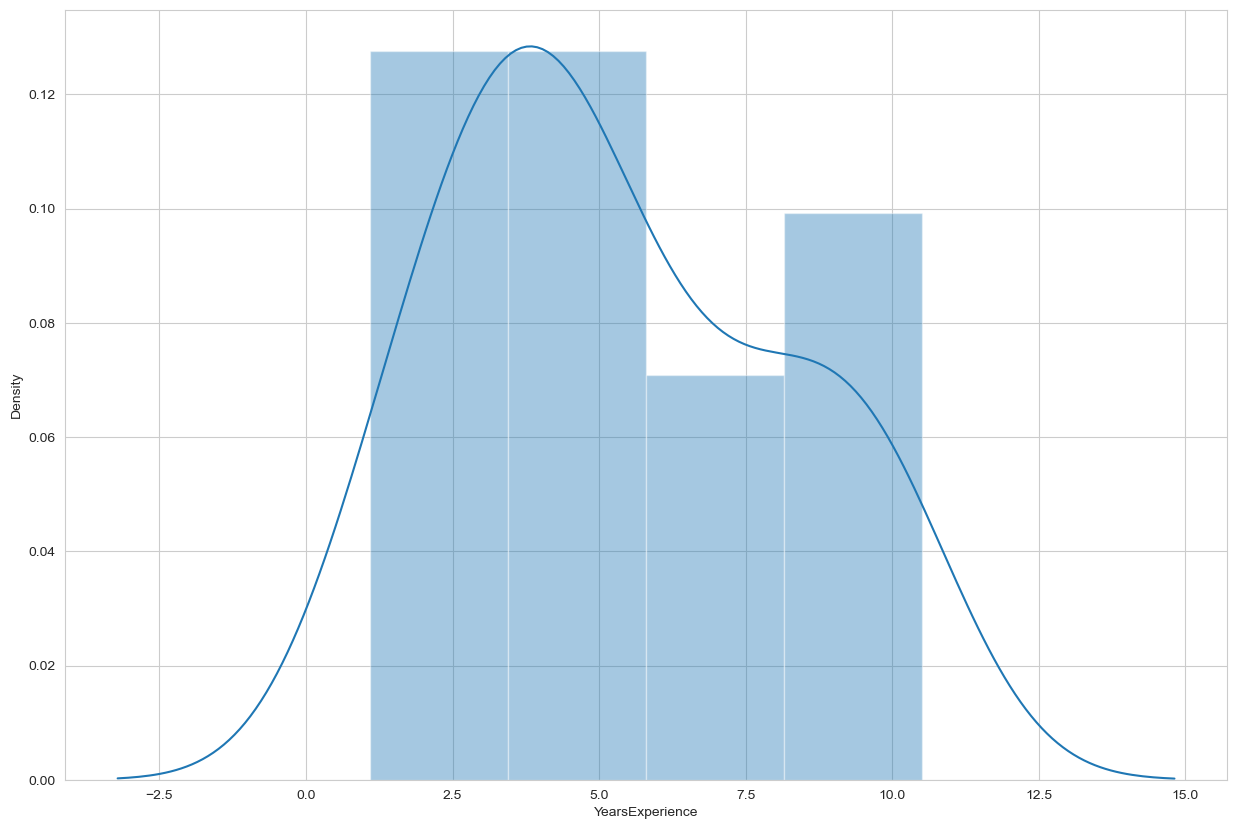

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.distplot(df.YearsExperience)
plt.show()


In [27]:
x=df.drop(columns=['Salary'])
x.shape

(30, 1)

In [29]:
y=df['YearsExperience']
y.shape


(30,)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [31]:
training_score=[]
testing_score=[]

In [32]:
from sklearn. metrics import r2_score

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred=model.predict(x_test)
    a= r2_score (y_train, x_train_pred)*100 
    b= r2_score (y_test,x_test_pred)*100
    training_score.append(a) 
    testing_score.append(b)
    print(f"r2_Score of (model) model on Training Data is:",a) 
    print(f"r2_Score of (model) model on Testing Data is: ",b)

In [33]:
from sklearn.linear_model import LinearRegression
model_prediction(LinearRegression())

r2_Score of (model) model on Training Data is: 100.0
r2_Score of (model) model on Testing Data is:  100.0


In [34]:
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())

r2_Score of (model) model on Training Data is: 100.0
r2_Score of (model) model on Testing Data is:  99.3215809220332


In [35]:
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_Score of (model) model on Training Data is: 99.93592209861903
r2_Score of (model) model on Testing Data is:  99.72656627434856


In [36]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of (model) model on Training Data is: 99.98691971576953
r2_Score of (model) model on Testing Data is:  99.33802039150098


In [37]:
models= ['Linear Regression','Decision Tree','Random Forest','CatBoost']

In [38]:
df1=pd.DataFrame({'Algorithms':models,'Training Score':training_score,'Testing Score':testing_score})
df1

,Algorithms,Training Score,Testing Score
0,Linear Regression,100.000000,100.000000
1,Decision Tree,100.000000,99.321581
2,Random Forest,99.935922,99.726566
3,CatBoost,99.986920,99.338020


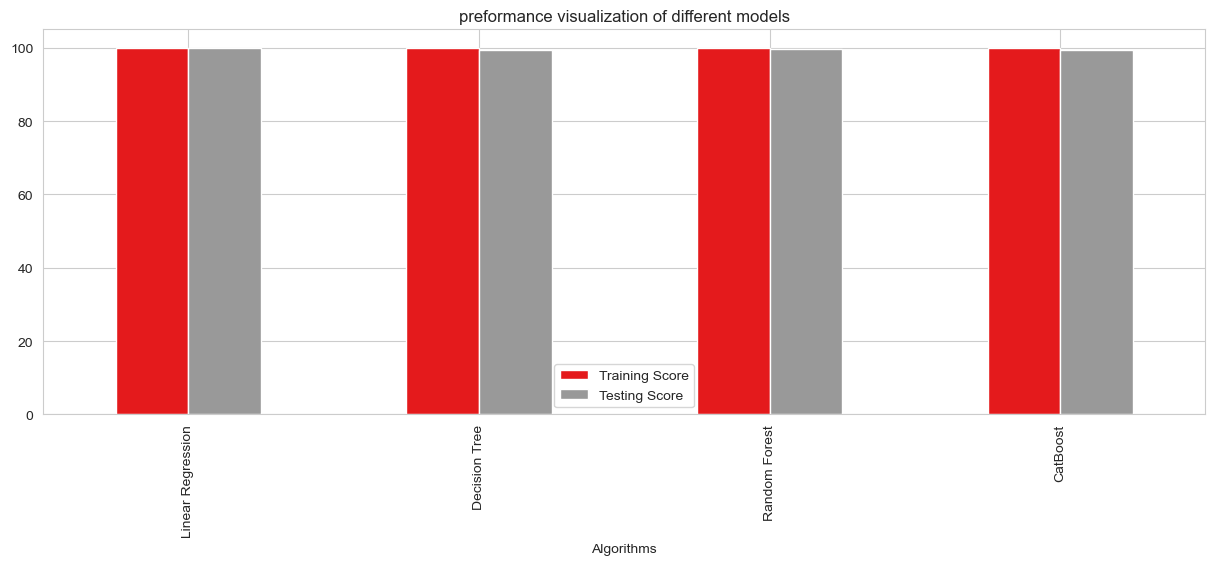

In [40]:
df1.plot(x='Algorithms',y=['Training Score','Testing Score'],figsize=(15,5),kind='bar',title='preformance visualization of different models',colormap='Set1')
plt.show()